## Environment setup

In [1]:
%matplotlib inline 
# Use %matplotlib ipympl or %matplotlib widget if you want interactive matplotlib plots
#%matplotlib widget 

# reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

In [2]:
import ast
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import plotly.express as px
import seaborn as sns
import scipy.stats as ss


from tqdm import tqdm

# To display dataframes as interactive tables in the notebook:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

# Globals

In [3]:
np.seterr(divide='ignore')

pd.options.display.max_colwidth = 150

TOL = 1.0e-12
SEED = 24

# Question 1

## Read data

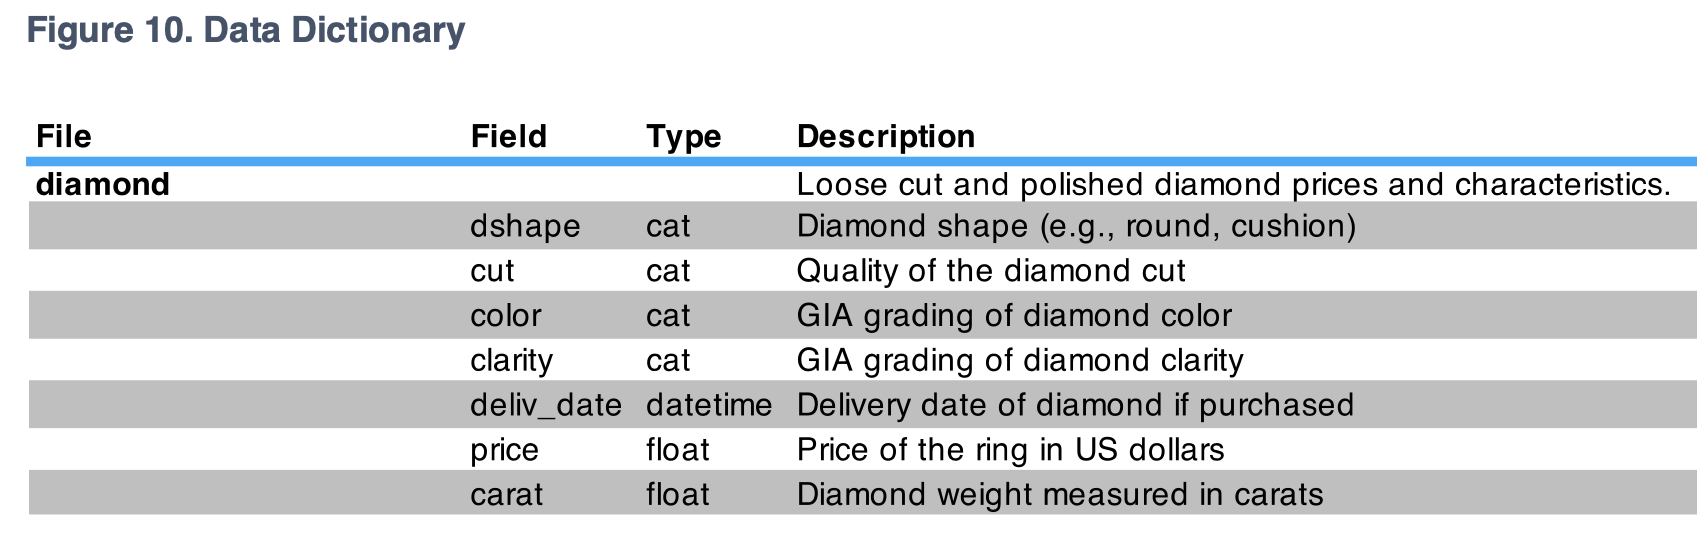

In [4]:
df = pd.read_parquet('data/20-diamonds.pq')

In [5]:
df

dshape        cut color clarity deliv_date     price  carat
0       Emerald  Very Good     J     SI2        NaT     112.0   0.30
1       Emerald       Good     K     SI1        NaT     212.0   0.30
2       Emerald  Very Good     J     SI1        NaT     215.0   0.30
3       Emerald  Very Good     I     SI2        NaT     215.0   0.30
4       Emerald  Very Good     K     VS2        NaT     215.0   0.30
...         ...        ...   ...     ...        ...       ...    ...
131109     Oval  Very Good     E      FL 2021-08-17  548774.0   8.28
131110  Emerald  Very Good     D      FL 2021-08-03  562401.0   7.00
131111    Round      Ideal     D    VVS2 2021-08-02  577753.0   8.10
131112  Emerald  Very Good     D      FL 2021-08-02  717968.0   8.16
131113    Round      Ideal     D      FL 2021-08-17  821831.0   7.81

[131114 rows x 7 columns]

In [6]:
df.head()

dshape        cut color clarity deliv_date  price  carat
0  Emerald  Very Good     J     SI2        NaT  112.0    0.3
1  Emerald       Good     K     SI1        NaT  212.0    0.3
2  Emerald  Very Good     J     SI1        NaT  215.0    0.3
3  Emerald  Very Good     I     SI2        NaT  215.0    0.3
4  Emerald  Very Good     K     VS2        NaT  215.0    0.3

In [7]:
df.tail()

dshape        cut color clarity deliv_date     price  carat
131109     Oval  Very Good     E      FL 2021-08-17  548774.0   8.28
131110  Emerald  Very Good     D      FL 2021-08-03  562401.0   7.00
131111    Round      Ideal     D    VVS2 2021-08-02  577753.0   8.10
131112  Emerald  Very Good     D      FL 2021-08-02  717968.0   8.16
131113    Round      Ideal     D      FL 2021-08-17  821831.0   7.81

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131114 entries, 0 to 131113
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   dshape      131114 non-null  object        
 1   cut         131114 non-null  object        
 2   color       131114 non-null  object        
 3   clarity     131114 non-null  object        
 4   deliv_date  129479 non-null  datetime64[ns]
 5   price       131114 non-null  float64       
 6   carat       131114 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 7.0+ MB


## check missing value

In [9]:
df.isnull().sum()

dshape           0
cut              0
color            0
clarity          0
deliv_date    1635
price            0
carat            0
dtype: int64

In [10]:
nat_percent = df.deliv_date.isnull().sum()/len(df.deliv_date)
print(f'The NaT count {nat_percent*100:.2f}% of the deliver date data')

The NaT count 1.25% of the deliver date data


## 1.25% of the dataset is not too much, we wanna drop those Missing Values

In [11]:
df = df.dropna()
print(df.isnull().sum())
df.info()

dshape        0
cut           0
color         0
clarity       0
deliv_date    0
price         0
carat         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 129479 entries, 1617 to 131113
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   dshape      129479 non-null  object        
 1   cut         129479 non-null  object        
 2   color       129479 non-null  object        
 3   clarity     129479 non-null  object        
 4   deliv_date  129479 non-null  datetime64[ns]
 5   price       129479 non-null  float64       
 6   carat       129479 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 7.9+ MB


In [12]:
df['l_price'] = np.log(df['price'])

/var/folders/d9/ssy00vr502v9yhsf6y9jbpv00000gn/T/ipykernel_821/398479972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['l_price'] = np.log(df['price'])


In [13]:
df['l_carat'] = np.log(df['carat'])

/var/folders/d9/ssy00vr502v9yhsf6y9jbpv00000gn/T/ipykernel_821/3660607376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['l_carat'] = np.log(df['carat'])


In [14]:
clist = ['dshape','cut','color','clarity']
for c in clist:
    d = pd.get_dummies(df[c],'i_'+c,drop_first=True)  # i 开头的意思是示性函数，对应dummy = 1 或 0 
    df = pd.concat((df,d),axis=1)

In [15]:
df['const'] = 1

In [16]:
df

dshape        cut color clarity deliv_date     price  carat  \
1617    Princess  Very Good     E     VS1 2021-08-04     338.0   0.23   
1618       Round      Ideal     J     SI2 2021-08-13     338.0   0.30   
1619       Round      Ideal     I     SI2 2021-08-11     338.0   0.31   
1620     Emerald       Good     F     SI1 2021-08-13     338.0   0.30   
1621     Emerald       Good     J    VVS1 2021-08-13     338.0   0.30   
...          ...        ...   ...     ...        ...       ...    ...   
131109      Oval  Very Good     E      FL 2021-08-17  548774.0   8.28   
131110   Emerald  Very Good     D      FL 2021-08-03  562401.0   7.00   
131111     Round      Ideal     D    VVS2 2021-08-02  577753.0   8.10   
131112   Emerald  Very Good     D      FL 2021-08-02  717968.0   8.16   
131113     Round      Ideal     D      FL 2021-08-17  821831.0   7.81   

          l_price   l_carat  i_dshape_Cushion  ...  i_color_J  i_color_K  \
1617     5.823046 -1.469676                 0  ...          0          0   
1618     5.823046 -1.203973                 0  ...          1          0   
1619     5.823046 -1.171183                 0  ...          0          0   
1620     5.823046 -1.203973                 0  ...          0          0   
1621     5.823046 -1.203973                 0  ...          1          0   
...           ...       ...               ...  ...        ...        ...   
131109  13.215442  2.113843                 0  ...          0          0   
131110  13.239970  1.945910                 0  ...          0          0   
131111  13.266902  2.091864                 0  ...          0          0   
131112  13.484180  2.099244                 0  ...          0          0   
131113  13.619290  2.055405                 0  ...          0          0   

        i_clarity_IF  i_clarity_SI1  i_clarity_SI2  i_clarity_VS1  \
1617               0              0              0              1   
1618               0              0              1              0   
1619               0              0              1              0   
1620               0              1              0              0   
1621               0              0              0              0   
...              ...            ...            ...            ...   
131109             0              0              0              0   
131110             0              0              0              0   
131111             0              0              0              0   
131112             0              0              0              0   
131113             0              0              0              0   

        i_clarity_VS2  i_clarity_VVS1  i_clarity_VVS2  const  
1617                0               0               0      1  
1618                0               0               0      1  
1619                0               0               0      1  
1620                0               0               0      1  
1621                0               1               0      1  
...               ...             ...             ...    ...  
131109              0               0               0      1  
131110              0               0               0      1  
131111              0               0               1      1  
131112              0               0               0      1  
131113              0               0               0      1  

[129479 rows x 36 columns]

# Question 2

## Split the sample into training and test datasets

In [17]:
train_size = 0.75
df_train = df.sample(frac=train_size,random_state=SEED)
train_idx = df_train.index
df_test = df.loc[~(df.index.isin(train_idx))]

assert set(df_test.index) & set(train_idx) == set() # 交集是空集
assert set(df_test.index) | set(train_idx) == set(df.index) # 并集是全集
assert (df_test.columns == df_train.columns).all() # 列名逐一相同

In [18]:
train_idx

Int64Index([ 34699,  78237,  17706,  42461,  31316, 124907,  83426, 116952,
            103695, 109625,
            ...
            104242,  85185,  50310,  62378,  85390,  91973,  60517,  90696,
             71935, 101519],
           dtype='int64', length=97109)

## Test the randomness of sample split

Test whether the train-test split resulted in representative samples of the `price` variable.

In [19]:
num_list = ['price','carat'] 
cat_list = ['dshape','cut','color','clarity']

**Sample mean equality**

In [20]:
mu=df[num_list].mean()
se=df[num_list].std()/np.sqrt(len(df))

mu_train=df_train[num_list].mean()
se_train=df_train[num_list].std()/np.sqrt(len(df_train)) #实际上是计算标准差的标准误差(standard error of standard deviation)。

mu_test=df_test[num_list].mean()
se_test=df_test[num_list].std()/np.sqrt(len(df_test))

t_train=(mu - mu_train) / np.sqrt(se**2 + se_train**2)
t_test=(mu - mu_test) / np.sqrt(se**2 + se_test**2)

x = pd.concat((mu,mu_train,mu_test,t_train,t_test),
          axis=1,
          keys=['avg-full','avg-train','avg-test','t_train','t_test']
         )

# test for significance
assert (x.t_train < 1.65).all()
assert (x.t_test < 1.65).all()

x.style.format("{:.2f}")

,avg-full,avg-train,avg-test,t_train,t_test
price,6491.15,6484.70,6510.49,0.10,-0.20
carat,0.86,0.86,0.86,0.02,-0.05


**Kolmogorov-Smirnov test**

In [21]:
ks_dict = {}
for n in num_list:
    ks = ss.kstest(df[n],df_train[n])
    ks_dict[n] = ks[1]
    assert ks_dict[n] > 0.10

ks_dict

{'price': 0.9972447118349695, 'carat': 0.9995339447488631}

Chi2 p-values in parentheses
   index   clarity          key
0    SI1  0.190309         Full
1    VS2  0.178670         Full
2    VS1  0.173688         Full
3    SI2  0.154187         Full
4   VVS2  0.137590         Full
5   VVS1  0.121000         Full
6     IF  0.040400         Full
7     FL  0.004155         Full
8     FL  0.004026  Train (99%)
9     IF  0.040542  Train (99%)
10   SI1  0.190405  Train (99%)
11   SI2  0.154939  Train (99%)
12   VS1  0.173753  Train (99%)
13   VS2  0.178336  Train (99%)
14  VVS1  0.120339  Train (99%)
15  VVS2  0.137660  Train (99%)
16    FL  0.004541   Test (82%)
17    IF  0.039975   Test (82%)
18   SI1  0.190022   Test (82%)
19   SI2  0.151931   Test (82%)
20   VS1  0.173494   Test (82%)
21   VS2  0.179673   Test (82%)
22  VVS1  0.122984   Test (82%)
23  VVS2  0.137380   Test (82%)
['dshape', 'cut', 'color', 'clarity']


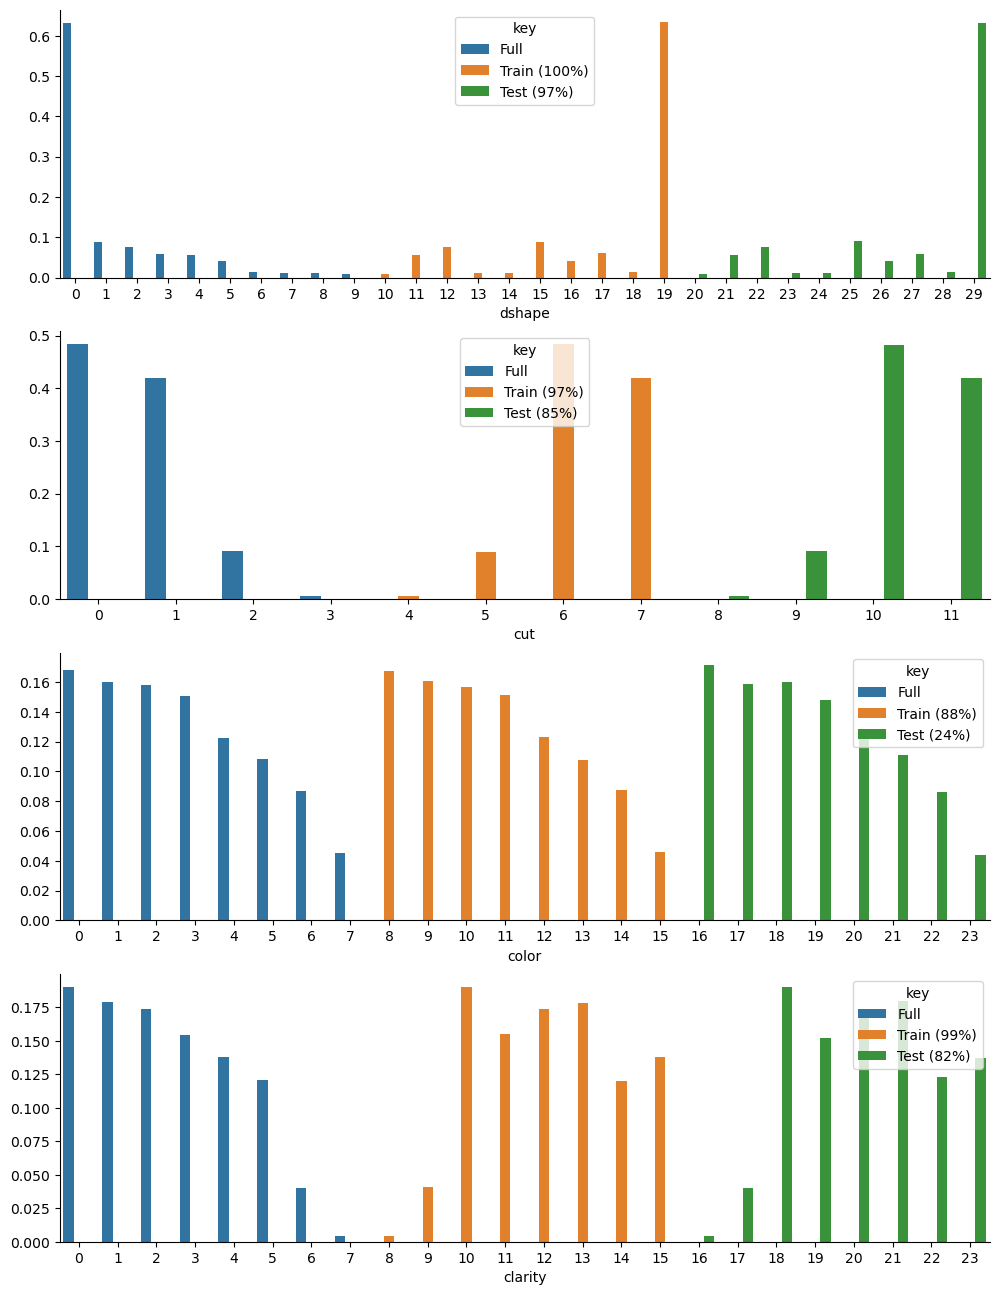

In [22]:
fig,axes=plt.subplots(len(cat_list),1,figsize=(12,len(cat_list)*4))
axes=np.ravel(axes)

#Below, inside the loop, for each categorical column (c), the following steps are performed:
#a. The relative frequencies of the unique values in the column c are calculated for the full dataset (df), the training dataset (df_train), and the test dataset (df_test).
#b. Chi-square tests are performed to compare the observed frequencies in the training and test datasets with the expected frequencies (if the distributions were the same as in the full dataset).
#c. The results of these tests are saved, and the relative frequencies for the full dataset, training dataset, and test dataset are organized into a single DataFrame (z), with annotations for the chi-square test p-values.
#sns.barplot(x=z.index, y=c, hue='key', data=z, ax=ax):
#    For each categorical column, a bar plot is created using Seaborn.
#    The plot shows the relative frequencies of each category in the full dataset, training dataset, and test dataset.
#    The hue parameter is used to differentiate between the datasets. E.g.,  the hue parameter determines which column in the data frame should be used for colour encoding.
#ax.set_xlabel(c) and subsequent lines:
#    These lines set the x-label to the name of the categorical column, remove the y-label, and hide the top and right spines of the plot for aesthetic purposes.
                                                                                                                                        
                                                                                                                                        
for c,ax in zip(cat_list,axes):
    eperc=df[c].value_counts(normalize=True)

    # train test
    etrain=(eperc*df_train.shape[0]).sort_index()
    atrain=df_train[c].value_counts().sort_index()
    chi2train=ss.chisquare(f_obs=atrain,f_exp=etrain)

    # test test
    etest=(eperc*df_test.shape[0]).sort_index()
    atest=df_test[c].value_counts().sort_index()
    chi2test=ss.chisquare(f_obs=atest,f_exp=etest)

    eperc=eperc.to_frame().assign(key='Full')
    trainperc=(atrain/atrain.sum()).to_frame().assign(key=f'Train ({chi2train.pvalue:.0%})')
    testperc=(atest/atest.sum()).to_frame().assign(key=f'Test ({chi2test.pvalue:.0%})')
    z = pd.concat((eperc,trainperc,testperc),axis=0).reset_index()

    #print(z.index)
    sns.barplot(x=z.index, y=c, hue='key', data=z,ax=ax)
    ax.set_xlabel(c)
    ax.set_ylabel("")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

print("Chi2 p-values in parentheses")
print(z)
print(cat_list)

## We can say that the training and test samples are “similar” enough.

In [23]:
df_train.reset_index(drop=True).to_parquet('data/diamond-split-train.pq')
df_test.reset_index(drop=True).to_parquet('data/diamond-split-test.pq')

# Question 4

### Estimate a linear regression of diamond prices on the diamond features and interpret your results. 
### You should estimate it on the training data sample.


In [24]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import multiprocessing
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy.stats as ss
import seaborn as sns
## Import various ML classes from Scikit-learn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
import statsmodels.api as sm
import string
from time import time

In [25]:
TRAINFILE = 'data/diamond-split-train.pq'
TESTFILE = 'data/diamond-split-test.pq'

np.seterr(divide='ignore')

CPUS = multiprocessing.cpu_count() #This function returns the number of CPU cores available on the machine. This includes both physical cores and logical cores if hyperthreading is enabled. For example, on a machine with 4 physical cores that supports hyperthreading (which makes 2 logical cores per physical core), this function would return 8.

In [26]:
def timer_func(func):
    def wrap_func(*args, **kwargs):
        t1 = time()
        result = func(*args, **kwargs)
        t2 = time()
        t = str(datetime.timedelta(seconds=t2-t1))
        print(f'Function {func.__name__!r} executed in {t}')
        return result
    return wrap_func

In [27]:
df_train = pd.read_parquet(TRAINFILE)

In [28]:
y_train = df_train.l_price

In [29]:
#    This line is a list comprehension that creates a list, xlist, containing certain column names from the DataFrame df_train.
#    It includes columns that start with 'const' or 'i_', but excludes those that start with 'i_c_zip' or 'i_c_room'.
#    The startswith method is used to check the beginning of the column names. The bitwise operators (| for OR and & for AND) are used in combination with the negation operator (~) to include or exclude specific columns based on their names.

xlist = ['l_carat'] + [c for c in df_train.columns if 
         (c.startswith('const') | c.startswith('i_')) 
        ]
X_train = df_train[xlist]
res=(
    sm
    .OLS(y_train,X_train)
    .fit(cov_type='cluster',cov_kwds={'groups':df_train.carat})
)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                l_price   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     8840.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:12:14   Log-Likelihood:                 45700.
No. Observations:               97109   AIC:                        -9.134e+04
Df Residuals:                   97081   BIC:                        -9.108e+04
Df Model:                          27                                         
Covariance Type:              cluster                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
l_carat               1.9973      0.020     98.372      0.000       1.958       2.037
i_dshape_Cushion     -0.0676      0.015     -4.549      0.000      -0.097      -0.038
i_dshape_Emerald      0.0314      0.016      2.006      0.045       0.001       0.062
i_dshape_Heart        0.1676      0.017      9.904      0.000       0.134       0.201
i_dshape_Marquise     0.1187      0.022      5.378      0.000       0.075       0.162
i_dshape_Oval         0.1267      0.018      6.865      0.000       0.091       0.163
i_dshape_Pear         0.1302      0.018      7.351      0.000       0.096       0.165
i_dshape_Princess     0.0752      0.015      4.992      0.000       0.046       0.105
i_dshape_Radiant      0.0212      0.012      1.701      0.089      -0.003       0.046
i_dshape_Round        0.3044      0.026     11.562      0.000       0.253       0.356
i_cut_Good           -0.3782      0.022    -17.475      0.000      -0.421      -0.336
i_cut_Ideal          -0.2286      0.017    -13.852      0.000      -0.261      -0.196
i_cut_Very Good      -0.3109      0.017    -18.547      0.000      -0.344      -0.278
i_color_E            -0.0525      0.003    -17.361      0.000      -0.058      -0.047
i_color_F            -0.0837      0.004    -22.155      0.000      -0.091      -0.076
i_color_G            -0.1295      0.008    -15.579      0.000      -0.146      -0.113
i_color_H            -0.1986      0.014    -14.095      0.000      -0.226      -0.171
i_color_I            -0.3392      0.017    -19.788      0.000      -0.373      -0.306
i_color_J            -0.4968      0.026    -19.460      0.000      -0.547      -0.447
i_color_K            -0.6942      0.032    -21.797      0.000      -0.757      -0.632
i_clarity_IF         -0.2488      0.021    -12.007      0.000      -0.289      -0.208
i_clarity_SI1        -0.6432      0.015    -41.686      0.000      -0.673      -0.613
i_clarity_SI2        -0.8045      0.014    -57.412      0.000      -0.832      -0.777
i_clarity_VS1        -0.4431      0.019    -23.264      0.000      -0.480      -0.406
i_clarity_VS2        -0.4986      0.016    -30.584      0.000      -0.531      -0.467
i_clarity_VVS1       -0.3304      0.022    -15.306      0.000      -0.373      -0.288
i_clarity_VVS2       -0.3986      0.021    -18.983      0.000      -0.440      -0.357
const                 9.3357      0.026    363.814      0.000       9.285       9.386
==============================================================================
Omnibus:                      998.422   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1158.406
Skew:                           0.196   Prob(JB):                    2.85e-252
Kurtosis:                       3.364   Cond. No.                         70.4
======================

### Cross-validation timed function

In [30]:
#@timer_func: This is a decorator. In Python, a decorator is a function that takes another function and extends its behavior without explicitly modifying it. @timer_func is likely a custom decorator, designed to measure and report the time it takes for the cval function to run.
#def cval(mod, X, y, folds=3, scoring='r2'):: This is the declaration of the function cval. It takes several arguments:
#    mod: The model to be cross-validated.
#    X: The features dataset.
#    y: The target dataset.
#    folds=3: An optional parameter that sets the number of folds for cross-validation. Here, it is set to 3. 
#    scoring='r2': Another optional parameter that defines the scoring metric to be used. Here, it is set to R2
# The triple quotes (''' ... '''): These lines are a docstring, providing a brief description of the function.
#cv = cross_val_score(mod, X, y, cv=folds, scoring=scoring, n_jobs=CPUS-1): This line calls the cross_val_score function from Scikit-learn.
#    cross_val_score is a utility to perform cross-validation.
#    n_jobs=CPUS-1 is an argument where CPUS is likely a variable indicating the number of CPU cores available. It tells the function to use one less than the total number of CPUs for parallel processing, which can speed up the computation.
@timer_func
def cval(mod,X,y,folds=3,scoring='r2'):
    ''' Args: mod, X, y, folds=3, scoring='r2' '''
    
    cv = cross_val_score(mod,X,y,cv=folds,scoring=scoring,n_jobs=CPUS-1)
    print(f"Fold scores:\n{cv}")
    print(f"Mean score: {cv.mean():.8f}")
    print(f"Default parameters:\n{mod.get_params()}")
    
    return cv

In [31]:
yvar = 'l_price'
y_train = df_train[yvar]


xvars =  (
    ['l_carat']
    + [c for c in df_train.columns if c.startswith('i_')]
)
X_train = df_train[xvars]

folds = 3
print(X_train)

        l_carat  i_dshape_Cushion  i_dshape_Emerald  i_dshape_Heart  \
0     -1.203973                 0                 0               0   
1      0.029559                 1                 0               0   
2     -1.309333                 0                 0               0   
3     -1.078810                 0                 0               0   
4     -1.203973                 0                 0               0   
...         ...               ...               ...             ...   
97104 -0.105361                 0                 1               0   
97105 -0.356675                 0                 0               0   
97106  0.009950                 0                 0               0   
97107 -0.544727                 0                 0               0   
97108  0.000000                 0                 0               0   

       i_dshape_Marquise  i_dshape_Oval  i_dshape_Pear  i_dshape_Princess  \
0                      0              0              0                

In [32]:
r = LinearRegression() #This is a call to the constructor of the LinearRegression class. 

In [33]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
r_cv = cross_val_score(r, #r: linear regression model instantiated above
                     X_train,
                     y_train,
                     cv=folds,
                     scoring='r2',
                     n_jobs=CPUS-1
                    )
print(f"Default model parameters:\n{r.get_params()}")
print(f"Fold scores:\n{r_cv}")
print(f"Mean score: {r_cv.mean():.8f}")

Default model parameters:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Fold scores:
[0.98647401 0.98640123 0.98639946]
Mean score: 0.98642490


## Lasso

In [34]:
# Instantiate the Lasso model
#https://scikit-learn.org/stable/modules/linear_model.html#lasso
#https://bookdown.org/ssjackson300/Machine-Learning-Lecture-Notes/the-lasso.html

lr = Lasso()

# cross-validate (lr_cv = cval(lr,X_train,y_train))
lr_cv = cross_val_score(lr,
                        X_train,
                        y_train,
                        cv=folds,
                        scoring='r2',
                        n_jobs=CPUS-1
                       )
print(f"Default parameters:\n{lr.get_params()}")
print(f"Fold scores:\n{lr_cv}")
print(f"Mean score: {lr_cv.mean():.8f}")

Default parameters:
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Fold scores:
[-4.06250488e-05 -3.55359208e-07 -3.29732703e-05]
Mean score: -0.00002465


In [35]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV 
#https://scikit-learn.org/stable/modules/grid_search.html#grid-search 

#    lr_gs = GridSearchCV(lr, param_grid=tuned_params, cv=folds, refit=False, n_jobs=CPUS-1, verbose=10).fit(X_train,y_train):
#        GridSearchCV: This is a class from a library like scikit-learn, used for exhaustive search over specified parameter values for an estimator.
#        lr: This is the estimator to be used in the grid search, presumably a Lasso regression model.
#        param_grid=tuned_params: This sets the parameters to search over.
#        cv=folds: Specifies the number of folds for cross-validation.
#        refit=False: This means the model will not be refitted on the whole dataset with the best found parameters.
#        n_jobs=CPUS-1: This is likely used for parallel processing, where CPUS is a variable indicating the number of CPU cores.
#        verbose=10: Sets the verbosity level for the grid search.
#        .fit(X_train,y_train): Fits the GridSearchCV instance to the training data.
#        lr_gs: The variable to which the fitted GridSearchCV object is assigned.
# Overall: this lasso_gs function is designed to perform a grid search for finding the best alpha parameter for a Lasso regression model, using a specified range of alpha values and training data. The @timer_func decorator measures and reports the execution time.
            
# Keep grid small to run quickly - the parameter to be optimized: alpha, which we set between 0 and 1
alphas = np.logspace(start=-5,stop=0,num=20,base=10.0)
@timer_func
def lasso_gs(alphas):
    tuned_params = {'alpha': alphas}
    lr_gs = GridSearchCV(lr,
                         param_grid=tuned_params, 
                         cv=folds,
                         refit=False,
                         n_jobs=CPUS-1,
                         verbose=10,
                        ).fit(X_train,y_train)

    return lr_gs
    
lr_gs = lasso_gs(alphas)
print(lr_gs)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Function 'lasso_gs' executed in 0:00:04.183842
GridSearchCV(cv=3, estimator=Lasso(), n_jobs=7,
             param_grid={'alpha': array([1.00000000e-05, 1.83298071e-05, 3.35981829e-05, 6.15848211e-05,
       1.12883789e-04, 2.06913808e-04, 3.79269019e-04, 6.95192796e-04,
       1.27427499e-03, 2.33572147e-03, 4.28133240e-03, 7.84759970e-03,
       1.43844989e-02, 2.63665090e-02, 4.83293024e-02, 8.85866790e-02,
       1.62377674e-01, 2.97635144e-01, 5.45559478e-01, 1.00000000e+00])},
             refit=False, verbose=10)


### Optimal Lasso (grid search) Model

In [37]:
print(f"Best parameter: {lr_gs.best_params_['alpha']:.4f} and score {lr_gs.best_score_:.8%}")

Best parameter: 0.0000 and score 98.64236041%


In [38]:
#lr_gs.cv_results_: The cv_results_ attribute of the GridSearchCV object stores a lot of information about the training process of each combination of hyperparameters tested during the grid search. This includes mean test scores, standard deviations of these scores, and more, for each hyperparameter combination.
#scores = lr_gs.cv_results_['mean_test_score']: This line extracts the mean test scores of the model for each combination of hyperparameters (in this context, probably for each value of alpha). The score here is the R-squared value,

# Score (i.e., R-squared) for each alpha
scores = lr_gs.cv_results_['mean_test_score']
# SD of the R-squared for each alpha
scores_sd = lr_gs.cv_results_['std_test_score']
# Standard error of the R-squared for each alpha
std_error = scores_sd / np.sqrt(folds)

cv_results = lr_gs.cv_results_
tempcvresults=pd.DataFrame(cv_results)
print(tempcvresults)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        1.988130      0.033962         0.005911        0.002217     0.00001   
1        1.744069      0.021956         0.004765        0.000721    0.000018   
2        1.488961      0.019179         0.003783        0.000276    0.000034   
3        1.223358      0.018447         0.003989        0.000596    0.000062   
4        0.836113      0.026189         0.004198        0.000983    0.000113   
5        0.644343      0.021563         0.003834        0.001055    0.000207   
6        0.271619      0.024761         0.004056        0.001020    0.000379   
7        0.121608      0.010696         0.004270        0.000823    0.000695   
8        0.196293      0.036545         0.003641        0.001025    0.001274   
9        0.051824      0.001055         0.003282        0.000239    0.002336   
10       0.046125      0.005607         0.003784        0.000201    0.004281   
11       0.049888      0.002856         

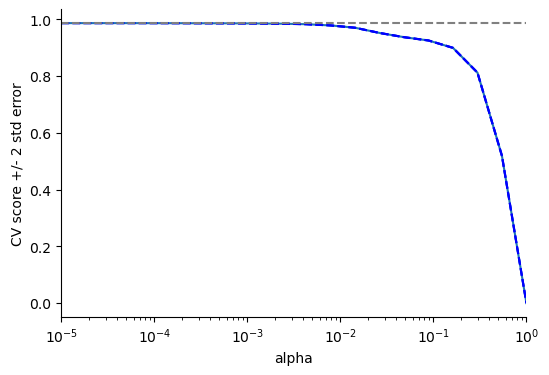

In [39]:
# Plotting scores (e.g., R-squared in this case) and alphas (e.g., the regularization parameter)
fig,ax=plt.subplots(1,1,figsize=(6,4))
ax.semilogx(alphas,scores)
ax.semilogx(alphas,scores + std_error, 'b--')
ax.semilogx(alphas,scores - std_error, 'b--')
ax.fill_between(alphas,scores + std_error, scores - std_error, alpha=0.2)
ax.set_ylabel('CV score +/- 2 std error')
ax.set_xlabel('alpha')
ax.axhline(np.max(scores), linestyle='--', color='.5')
ax.set_xlim([alphas[0], alphas[-1]])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

## Random forest

In [40]:
rf = RandomForestRegressor(random_state=SEED)

In [41]:
rf_cv = cross_val_score(rf,
                        X_train,
                        y_train,
                        cv=folds,
                        scoring='r2',
                        n_jobs=CPUS-1
                       )
print(f"Default parameters:\n{rf.get_params()}")
print(f"Fold scores:\n{rf_cv}")
print(f"Mean score: {rf_cv.mean():.8f}")

Default parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 24, 'verbose': 0, 'warm_start': False}
Fold scores:
[0.99209436 0.99210855 0.99215228]
Mean score: 0.99211840


In [48]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 24,
 'verbose': 0,
 'warm_start': False}

In [42]:
#    n_estimators: Specifies the number of trees in the forest. np.linspace(50,1000,20,dtype=int) generates an array of 20 values evenly spaced between 50 and 1000, converted to integers. These values represent different sizes of the forest to be tested.
#    max_features: The number of features to consider when looking for the best split. Two options are provided: 'sqrt' and 'log2'. 'sqrt' means that only a subset of features (square root of the total number) is considered, and 'log2' implies a subset of size log2 of the total number of features.
#    min_samples_leaf: The minimum number of samples required to be at a leaf node. Different values like 1, 2, and 4 are tested.
#    min_samples_split: The minimum number of samples required to split an internal node. The grid includes 2, 4, and 8 as possible values.
    
pgrid = {
    'n_estimators': np.linspace(50,1000,20,dtype=int),
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,4,8],
}

@timer_func
def random_forest_rs(pgrid,folds):
    rf_rs = RandomizedSearchCV(estimator=rf,
                               param_distributions=pgrid,
                               scoring='r2',
                               n_iter=30,
                               cv=folds,
                               verbose=10,
                               n_jobs=CPUS-1,
                               random_state=SEED,
                               error_score='raise'  # Add this line
                              ).fit(X_train,y_train)
    
    return rf_rs

rf_rs = random_forest_rs(pgrid,folds)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 2/20] START alpha=1.8329807108324375e-05...............................
[CV 1/3; 2/20] END alpha=1.8329807108324375e-05;, score=0.986 total time=   1.7s
[CV 3/3; 3/20] START alpha=3.359818286283781e-05................................
[CV 3/3; 3/20] END .alpha=3.359818286283781e-05;, score=0.986 total time=   1.5s
[CV 2/3; 7/20] START alpha=0.000379269019073225.................................
[CV 2/3; 7/20] END ..alpha=0.000379269019073225;, score=0.986 total time=   0.3s
[CV 1/3; 8/20] START alpha=0.0006951927961775605................................
[CV 1/3; 8/20] END .alpha=0.0006951927961775605;, score=0.986 total time=   0.1s
[CV 3/3; 8/20] START alpha=0.0006951927961775605................................
[CV 3/3; 8/20] END .alpha=0.0006951927961775605;, score=0.986 total time=   0.1s
[CV 2/3; 11/20] START alpha=0.004281332398719391................................
[CV 2/3; 11/20] END .alpha=0.004281332398719391;

/Users/yangzhiganlu/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/3; 1/20] START alpha=1e-05................................................
[CV 3/3; 1/20] END .................alpha=1e-05;, score=0.986 total time=   2.0s
[CV 2/3; 5/20] START alpha=0.00011288378916846884...............................
[CV 2/3; 5/20] END alpha=0.00011288378916846884;, score=0.986 total time=   0.8s
[CV 2/3; 8/20] START alpha=0.0006951927961775605................................
[CV 2/3; 8/20] END .alpha=0.0006951927961775605;, score=0.986 total time=   0.1s
[CV 1/3; 10/20] START alpha=0.002335721469090121................................
[CV 1/3; 10/20] END .alpha=0.002335721469090121;, score=0.985 total time=   0.1s
[CV 3/3; 10/20] START alpha=0.002335721469090121................................
[CV 3/3; 10/20] END .alpha=0.002335721469090121;, score=0.984 total time=   0.1s
[CV 1/3; 12/20] START alpha=0.007847599703514606................................
[CV 1/3; 12/20] END .alpha=0.007847599703514606;, score=0.978 total time=   0.1s
[CV 3/3; 13/20] START alpha=

[CV 1/3; 3/20] START alpha=3.359818286283781e-05................................
[CV 1/3; 3/20] END .alpha=3.359818286283781e-05;, score=0.986 total time=   1.5s
[CV 2/3; 3/20] START alpha=3.359818286283781e-05................................
[CV 2/3; 3/20] END .alpha=3.359818286283781e-05;, score=0.986 total time=   1.5s
[CV 3/3; 6/20] START alpha=0.00020691380811147902...............................
[CV 3/3; 6/20] END alpha=0.00020691380811147902;, score=0.986 total time=   0.6s
[CV 2/3; 9/20] START alpha=0.0012742749857031334................................
[CV 2/3; 9/20] END .alpha=0.0012742749857031334;, score=0.985 total time=   0.2s
[CV 2/3; 14/20] START alpha=0.026366508987303583................................
[CV 2/3; 14/20] END .alpha=0.026366508987303583;, score=0.952 total time=   0.1s
[CV 2/3; 16/20] START alpha=0.08858667904100823.................................
[CV 2/3; 16/20] END ..alpha=0.08858667904100823;, score=0.926 total time=   0.0s
[CV 3/3; 18/20] START alpha=

[CV 1/3; 19/30] START max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=300
[CV 1/3; 19/30] END max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=300;, score=0.982 total time=  10.4s
[CV 3/3; 20/30] START max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=900
[CV 3/3; 20/30] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=900;, score=0.989 total time=  46.1s
Function 'random_forest_rs' executed in 0:05:08.019229


In [43]:
print(f"Best parameters:\n{rf_rs.best_params_}")
print(f"Best score:\n{rf_rs.best_score_}")

Best parameters:
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Best score:
0.9906705155457906
[CV 1/3; 22/30] START max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=550
[CV 1/3; 22/30] END max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=550;, score=0.987 total time=  22.8s
[CV 3/3; 22/30] START max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=550
[CV 3/3; 22/30] END max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=550;, score=0.986 total time=  22.8s
[CV 2/3; 25/30] START max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400
[CV 2/3; 25/30] END max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=0.982 total time=  14.9s
[CV 3/3; 27/30] START max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=300
[CV 3/3; 27/30] END max_features=sqrt, min_samples_leaf=1, min_samples_s

[CV 2/3; 7/30] START max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500
[CV 2/3; 7/30] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500;, score=0.990 total time=  24.1s
[CV 1/3; 10/30] START max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=850
[CV 1/3; 10/30] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=850;, score=0.990 total time=  55.4s
[CV 2/3; 12/30] START max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800
[CV 2/3; 12/30] END max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=0.986 total time=  29.9s
[CV 3/3; 16/30] START max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=350
[CV 3/3; 16/30] END max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=350;, score=0.985 total time=  13.1s
[CV 3/3; 18/30] START max_features=log2, min_samples_leaf=1, min_samples_split=4, n_es

In [49]:
# Instantiate model with optimal parameters
cval(RandomForestRegressor(random_state=SEED, **rf_rs.best_params_),X_train,y_train)

Fold scores:
[0.99074559 0.99077423 0.99049173]
Mean score: 0.99067052
Default parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 24, 'verbose': 0, 'warm_start': False}
Function 'cval' executed in 0:00:34.959588


array([0.99074559, 0.99077423, 0.99049173])

## Gradient Boosting

In [50]:
gb = GradientBoostingRegressor(random_state=SEED)

In [51]:
# gb_cv = cval(gb,X_train,y_train)
gb_cv = cross_val_score(gb,
                        X_train,
                        y_train,
                        cv=folds,
                        scoring='r2',
                        n_jobs=CPUS-1
                       )
print(f"Default parameters:\n{gb.get_params()}")
print(f"Fold scores:\n{gb_cv}")
print(f"Mean score: {gb_cv.mean():.8f}")

Default parameters:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 24, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Fold scores:
[0.98829786 0.98799231 0.98778249]
Mean score: 0.98802422


In [52]:
pgrid = {
    'learning_rate': [0.1,0.05,0.01],
    'n_estimators': [100,200,300],
    'max_depth': [4,6,8],
    'min_samples_leaf': [1,5,10]
}

In [53]:
@timer_func
def gradient_boosting_gs(pgrid, folds):    
    gb_gs = RandomizedSearchCV(estimator=gb,
                               param_distributions=pgrid,
                               scoring='r2',
                               n_iter=30,
                               cv=folds,
                               verbose=10,
                               n_jobs=CPUS-1,
                               random_state=SEED
                              ).fit(X_train,y_train)
    
    return gb_gs

gb_gs = gradient_boosting_gs(pgrid,folds)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Function 'gradient_boosting_gs' executed in 0:03:40.926924


In [54]:
print(f"Best parameters:\n{gb_gs.best_params_}")
print(f"Best score:\n{gb_gs.best_score_}")

Best parameters:
{'n_estimators': 300, 'min_samples_leaf': 10, 'max_depth': 8, 'learning_rate': 0.1}
Best score:
0.9933081289657837


In [55]:
cval(GradientBoostingRegressor(random_state=SEED, **gb_gs.best_params_),X_train,y_train)

Fold scores:
[0.99332183 0.99327314 0.99332942]
Mean score: 0.99330813
Default parameters:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_iter_no_change': None, 'random_state': 24, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Function 'cval' executed in 0:00:18.906757


array([0.99332183, 0.99327314, 0.99332942])

# Model Comparison

In [56]:
print(f"OLS: {r_cv.mean():.6f}")
print(f"Lasso: {lr_gs.best_score_:.6f}")
print(f"Random Forest: {rf_rs.best_score_:.6f}")
print(f"Gradient Boosting: {gb_gs.best_score_:.6f}")

OLS: 0.986425
Lasso: 0.986424
Random Forest: 0.990671
Gradient Boosting: 0.993308


### We choose Gradient Boosting to predict test data

# Problem 7

## Read tests data

In [57]:
df_test = pd.read_parquet(TESTFILE)

## Create test variables

In [58]:
y_test = df_test[yvar]
X_test = df_test[xvars]

In [61]:
bm = GradientBoostingRegressor(random_state=SEED, **gb_gs.best_params_).fit(X_train,y_train)

[CV 1/3; 2/30] START learning_rate=0.01, max_depth=6, min_samples_leaf=1, n_estimators=300
[CV 1/3; 2/30] END learning_rate=0.01, max_depth=6, min_samples_leaf=1, n_estimators=300;, score=0.982 total time=  21.9s
[CV 2/3; 5/30] START learning_rate=0.05, max_depth=6, min_samples_leaf=1, n_estimators=100
[CV 2/3; 5/30] END learning_rate=0.05, max_depth=6, min_samples_leaf=1, n_estimators=100;, score=0.990 total time=   6.9s
[CV 1/3; 7/30] START learning_rate=0.1, max_depth=8, min_samples_leaf=5, n_estimators=300
[CV 1/3; 7/30] END learning_rate=0.1, max_depth=8, min_samples_leaf=5, n_estimators=300;, score=0.993 total time=  25.3s
[CV 3/3; 10/30] START learning_rate=0.1, max_depth=6, min_samples_leaf=5, n_estimators=200
[CV 3/3; 10/30] END learning_rate=0.1, max_depth=6, min_samples_leaf=5, n_estimators=200;, score=0.993 total time=  13.4s
[CV 1/3; 14/30] START learning_rate=0.01, max_depth=6, min_samples_leaf=10, n_estimators=300
[CV 1/3; 14/30] END learning_rate=0.01, max_depth=6, min_

In [63]:
print(f"Train data score: {bm.score(X_train,y_train):.6f}")
print(f"Test data score: {bm.score(X_test,y_test):.6f}")

Train data score: 0.994232
Test data score: 0.993460


We believe the best model is the Gradient Boosting model, as its coefficient of determination (R2) on the test set reached the highest at 0.99346. The difference in R2 between the test set and training set for this model is only 0.0008. We think this model's performance is good enough to meet Kerry's requirements since it has little error.

# Question 8

In [109]:
df = df.reset_index(drop = True)

In [110]:
df.index

RangeIndex(start=0, stop=129479, step=1)

In [111]:
X_all = df[xvars]
y_all = df[yvar]

In [112]:
X_all

l_carat  i_dshape_Cushion  i_dshape_Emerald  i_dshape_Heart  \
0      -1.469676                 0                 0               0   
1      -1.203973                 0                 0               0   
2      -1.171183                 0                 0               0   
3      -1.203973                 0                 1               0   
4      -1.203973                 0                 1               0   
...          ...               ...               ...             ...   
129474  2.113843                 0                 0               0   
129475  1.945910                 0                 1               0   
129476  2.091864                 0                 0               0   
129477  2.099244                 0                 1               0   
129478  2.055405                 0                 0               0   

        i_dshape_Marquise  i_dshape_Oval  i_dshape_Pear  i_dshape_Princess  \
0                       0              0              0                  1   
1                       0              0              0                  0   
2                       0              0              0                  0   
3                       0              0              0                  0   
4                       0              0              0                  0   
...                   ...            ...            ...                ...   
129474                  0              1              0                  0   
129475                  0              0              0                  0   
129476                  0              0              0                  0   
129477                  0              0              0                  0   
129478                  0              0              0                  0   

        i_dshape_Radiant  i_dshape_Round  ...  i_color_I  i_color_J  \
0                      0               0  ...          0          0   
1                      0               1  ...          0          1   
2                      0               1  ...          1          0   
3                      0               0  ...          0          0   
4                      0               0  ...          0          1   
...                  ...             ...  ...        ...        ...   
129474                 0               0  ...          0          0   
129475                 0               0  ...          0          0   
129476                 0               1  ...          0          0   
129477                 0               0  ...          0          0   
129478                 0               1  ...          0          0   

        i_color_K  i_clarity_IF  i_clarity_SI1  i_clarity_SI2  i_clarity_VS1  \
0               0             0              0              0              1   
1               0             0              0              1              0   
2               0             0              0              1              0   
3               0             0              1              0              0   
4               0             0              0              0              0   
...           ...           ...            ...            ...            ...   
129474          0             0              0              0              0   
129475          0             0              0              0              0   
129476          0             0              0              0              0   
129477          0             0              0              0              0   
129478          0             0              0              0              0   

        i_clarity_VS2  i_clarity_VVS1  i_clarity_VVS2  
0                   0               0               0  
1                   0               0               0  
2                   0               0               0  
3                   0               0               0  
4                   0               1               0  
...               ...             ...             ...  
1

In [113]:
y_all

l_price
Loading... (need help?)


In [114]:
y_all_hat = pd.Series(bm.predict(X_all))  # predicted values
x = (
    pd
    .concat((y_all,y_all_hat),axis=1,keys=['l_price','l_price_hat'])
    .assign(price=lambda x: np.exp(x.l_price),
            price_hat=lambda x: np.exp(x.l_price_hat))
    .assign(
            l_err=lambda x: x.l_price - x.l_price_hat,
            err=lambda x: x.price - x.price_hat
           )
)

In [115]:
percs = [0.01,0.5,0.99]
x.describe(percs).T

count         mean           std            min           1%  \
l_price      129479.0     7.820430      1.297767       5.823046     5.902633   
l_price_hat  129479.0     7.820272      1.293587       5.687831     5.945513   
price        129479.0  6491.146950  15853.039907     338.000000   366.000000   
price_hat    129479.0  6437.489092  15313.073065     295.252500   382.035336   
l_err        129479.0     0.000158      0.100193      -0.616256    -0.250745   
err          129479.0    53.657858   2339.378820 -110968.937197 -3963.220969   

                     50%           99%            max  
l_price         7.764296     11.127034      13.619290  
l_price_hat     7.764166     11.120380      13.457034  
price        2355.000000  67984.440000  821831.000000  
price_hat    2354.694062  67533.592699  698740.267113  
l_err           0.005130      0.237375       0.841370  
err             6.229776   4431.671931  162690.578968

In [116]:
x

l_price  l_price_hat     price      price_hat     l_err  \
0        5.823046     5.858622     338.0     350.241090 -0.035576   
1        5.823046     5.962436     338.0     388.555451 -0.139390   
2        5.823046     6.083573     338.0     438.593701 -0.260528   
3        5.823046     5.898416     338.0     364.459822 -0.075370   
4        5.823046     5.870077     338.0     354.276416 -0.047032   
...           ...          ...       ...            ...       ...   
129474  13.215442    13.130362  548774.0  504015.427955  0.085080   
129475  13.239970    13.030002  562401.0  455887.786821  0.209968   
129476  13.266902    13.181043  577753.0  530217.800885  0.085859   
129477  13.484180    13.268648  717968.0  578762.754247  0.215532   
129478  13.619290    13.457034  821831.0  698740.267113  0.162256   

                  err  
0          -12.241090  
1          -50.555451  
2         -100.593701  
3          -26.459822  
4          -16.276416  
...               ...  
129474   44758.572045  
129475  106513.213179  
129476   47535.199115  
129477  139205.245753  
129478  123090.732887  

[129479 rows x 6 columns]

In [117]:
w = (
    pd
    .concat((df[['price','dshape','cut','color','carat','clarity']],
               x[['price_hat','l_err','err']]),
              axis=1)
    .assign(
            diff=lambda x: x.price - x.price_hat,
            perc_diff=lambda x: x.price/x.price_hat - 1
           )
    .sort_values('perc_diff')
)

In [118]:
w

price    dshape        cut color  carat clarity      price_hat  \
128779  95985.0   Asscher  Very Good     D   5.27     VS1  177762.454419   
41444    1110.0   Asscher  Very Good     D   0.70     SI2    1857.787550   
95339    5768.0   Cushion  Very Good     G   1.70     SI2    9426.856561   
103087   7743.0     Round      Ideal     H   1.06      FL   12624.550755   
78368    3386.0  Princess  Very Good     E   0.92    VVS2    5508.996801   
...         ...       ...        ...   ...    ...     ...            ...   
126004  37429.0     Round      Ideal     E   2.00     SI2   19477.749229   
125857  36412.0      Oval       Good     G   2.01     SI1   18579.272388   
37331     937.0      Pear  Very Good     D   0.29    VVS1     477.408452   
125707  35474.0     Round      Ideal     H   2.08     SI2   17284.830959   
119317  17075.0      Oval  Very Good     E   1.01    VVS1    7361.366271   

           l_err           err          diff  perc_diff  
128779 -0.616256 -81777.454419 -81777.454419  -0.460038  
41444  -0.515026   -747.787550   -747.787550  -0.402515  
95339  -0.491237  -3658.856561  -3658.856561  -0.388131  
103087 -0.488854  -4881.550755  -4881.550755  -0.386671  
78368  -0.486733  -2122.996801  -2122.996801  -0.385369  
...          ...           ...           ...        ...  
126004  0.653173  17951.250771  17951.250771   0.921629  
125857  0.672852  17832.727612  17832.727612   0.959818  
37331   0.674311    459.591548    459.591548   0.962680  
125707  0.718971  18189.169041  18189.169041   1.052320  
119317  0.841370   9713.633729   9713.633729   1.319542  

[129479 rows x 11 columns]

## The pricing errors in absolute term:  diff 
## The pricing errors in relative term(logs):  l_err

In [119]:
w.isnull().sum()

price        0
dshape       0
cut          0
color        0
carat        0
clarity      0
price_hat    0
l_err        0
err          0
diff         0
perc_diff    0
dtype: int64

We can utilize this accurate diamond pricing model to price diamonds based on their characteristics and compare the predicted prices with the actual market prices of the diamonds. If we can identify diamonds that are significantly underpriced relative to their predicted prices, we know that these diamonds are undervalued. By leveraging this model, we can purchase diamonds in the market at a lower cost and thereby increase our profit margins. This strategy allows us to capitalize on the discrepancies between the model's predicted prices and the actual market prices, enabling us to make informed purchasing decisions and potentially enhance our profitability in the diamond trade.